# Customer Analysis

## Problem (case study)

### Abstract

**Data Description**:  

+ **customer :** `Customer ID`                        
+ **state :** `US State`                      
+ **customer_lifetime_value :** `CLV is the client economic value for a company during all their relationship`
+ **response :**  `Response to marketing calls (customer engagement)`                   
+ **coverage :** `Customer coverage type`                        
+ **education** `Customer education level`                   
+ **effective_to_date :** `Effective to date`              
+ **employmentstatus :** `Customer employment status`                
+ **gender :**  `Customer gender`                  
+ **income :**  `Customer income`
+ **location_code :** `Customer living zone`                  
+ **marital_status :** `Customer marital status`                  
+ **monthly_premium_auto :** `Monthly premium`            
+ **months_since_last_claim :** `Last customer claim`          
+ **months_since_policy_inception :** `Policy Inception`    
+ **number_of_open_complaints :** `Open claims`        
+ **number_of_policies :** `Number policies`              
+ **policy_type :** `Policy type`                     
+ **policy :** `Policy`                         
+ **renew_offer_type :**  `Renew offer`                 
+ **sales_channel :**  `Sales channel (customer-company first contact)`                 
+ **total_claim_amount :** `Claims amount`              
+ **vehicle_class :**  `Vehicle class`                 
+ **vehicle_size :**  `Vehicle size`  


**Goals:**

Improve CLV with marketing aproach.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd    

pd.set_option('display.max_columns', None)

## Getting Data

In [2]:
data=pd.read_csv('data/Marketing-Customer-Analysis.csv')    

data.columns=[e.lower().replace(' ', '_') for e in data.columns]

data.head()    

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## EDA 

#### Target

In [3]:
data.customer_lifetime_value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

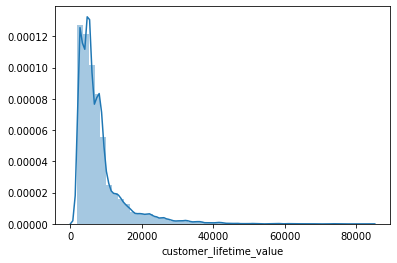

In [4]:
sns.distplot(data.customer_lifetime_value);

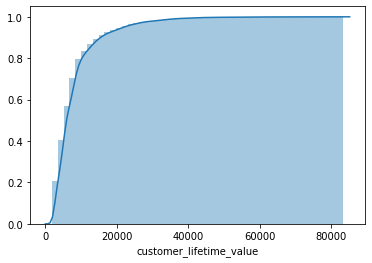

In [5]:
sns.distplot(data.customer_lifetime_value, 
             hist_kws={'cumulative':True}, 
             kde_kws={'cumulative':True});

#### Analysis

#### a) Getting the total numbers of customers who have responded to marketing calls

In [6]:
data.groupby('response').count().customer

response
No     7826
Yes    1308
Name: customer, dtype: int64

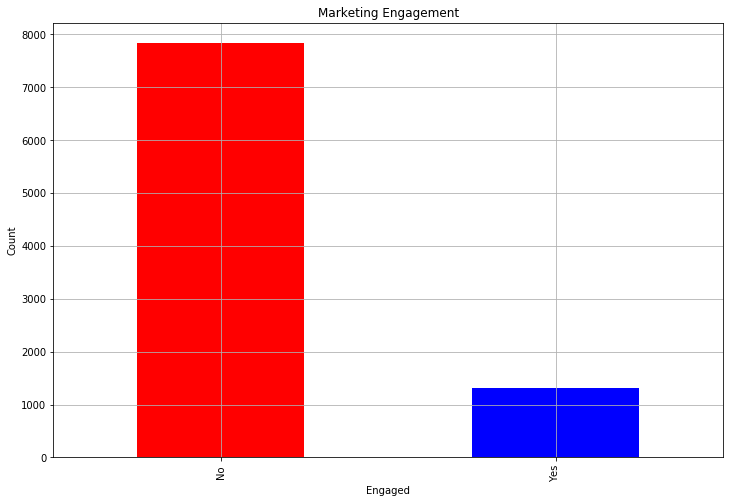

In [7]:
# bar chart

ax=data.groupby('response').count().customer.plot(
                 kind='bar',
                 color=['r', 'b'],
                 grid=True,
                 figsize=(12,8),
                 title='Marketing Engagement')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show();

In [8]:
# % of engaged and non-engaged users

data.groupby('response').count().customer/data.shape[0]

response
No     0.856799
Yes    0.143201
Name: customer, dtype: float64

**From this output we can see that only 14% of the customers responded to marketing calls**

#### b) Renew offer

We will now look at the Renew offer type column of the dataframe. Let's find out what type of offer worked best for the customers

In [9]:
# count only engaged customers grouped by renewal offer type

by_offer_type=data.loc[data.response=='Yes']\
                  .groupby(['renew_offer_type'])\
                  .count().customer/data.groupby('renew_offer_type').count().customer

by_offer_type

renew_offer_type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: customer, dtype: float64

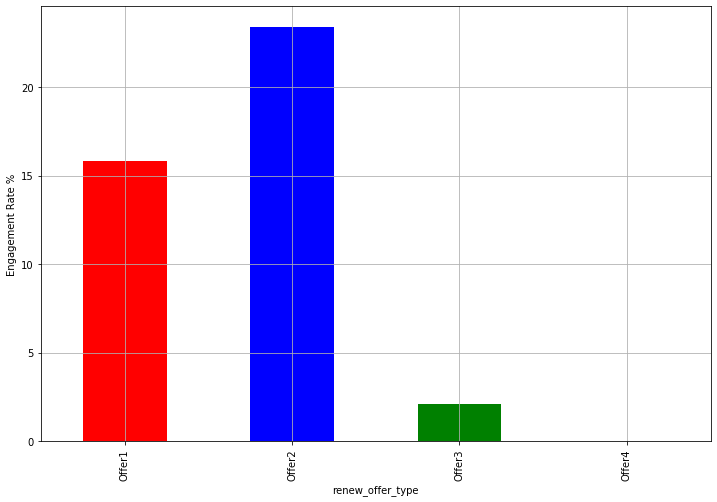

In [10]:
# bar plot
ax=(by_offer_type*100.0).plot(kind='bar', figsize=(12,8),
                              color=['r','b','g','y'], grid=True)

ax.set_ylabel('Engagement Rate %')

plt.show();

**We can see that Offer Type 2 has the highest engagement rate**

#### c) Renew/Attribute


We are going to understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle class.¶


In [11]:
def engage(res, group1, group2):
    df=data.loc[data.response==res].groupby([group1,group2])\
           .count().customer/data.groupby(group1).count().customer  # customers grouping the data by these two columns
    
    df=df.unstack().fillna(0)    # using unstack function to make it more readable
    
    ax=(df*100.0).plot(kind='bar', figsize=(12, 8), grid=True)  # bar plot (%)

    ax.set_ylabel('Engagement Rate (%)')
    plt.show();
    
    return df

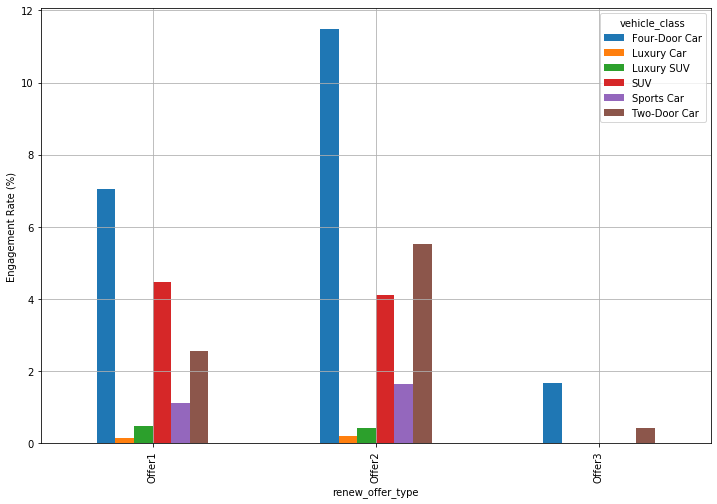

vehicle_class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
renew_offer_type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


In [12]:
engage('Yes', 'renew_offer_type', 'vehicle_class')

**We already knew from the previous section “Engagement Rates by Offer Type” that Offer2 had the highest response rate among customers. Now we can add more insights by having broken down the customer attributes with the category “Vehicle class”: we can notice that customers with Four-Door Car respond more frequentlyfor all offer types and that those with “Luxury SUV” respond with a higher chance to Offer1 than to Offer2.If we have significantly difference in the response rates among different customer rates, we can fine-tune who to target for different set of offers.**

In [13]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

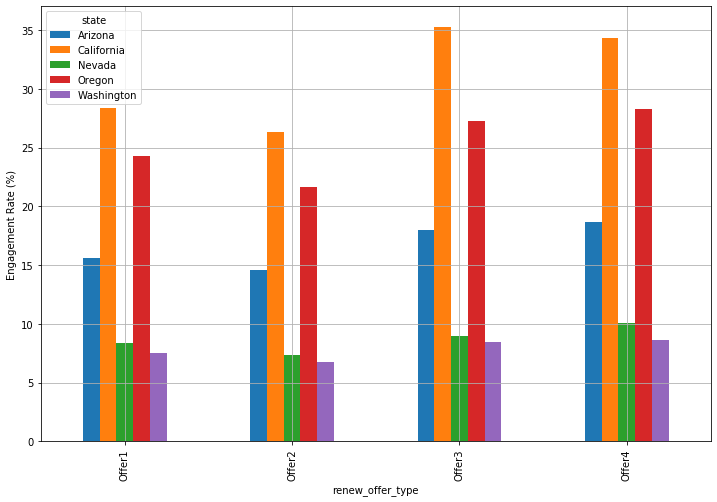

state,Arizona,California,Nevada,Oregon,Washington
renew_offer_type,,,,,
Offer1,0.155917,0.284115,0.083422,0.242804,0.075426
Offer2,0.145933,0.263500,0.073137,0.216336,0.067327
Offer3,0.179469,0.352654,0.089385,0.273045,0.084497
Offer4,0.186523,0.343750,0.100586,0.283203,0.085938


In [14]:
engage('No', 'renew_offer_type', 'state')

#### d) Analyzing engagement rates by gender

In [15]:
by_gender=data.loc[data.response=='Yes'].groupby('gender')\
                     .count().customer/data.groupby('gender').count().customer*100

by_gender

gender
F    14.169171
M    14.477212
Name: customer, dtype: float64

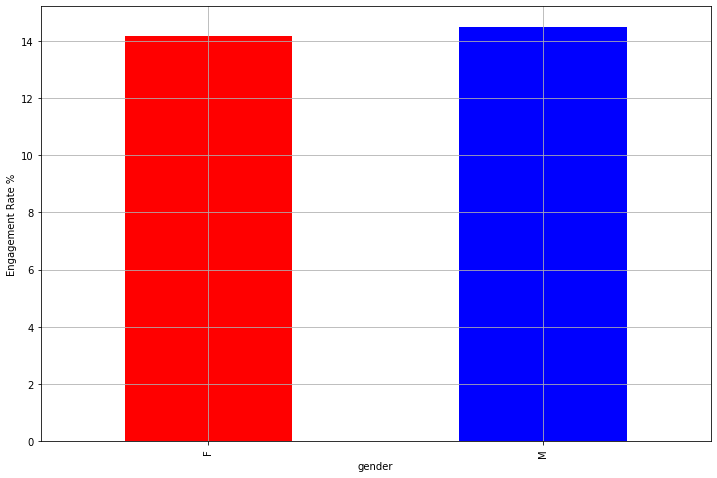

In [16]:
ax=by_gender.plot(kind='bar', figsize=(12,8),
                                 color=['r','b','g','y'], grid=True)

ax.set_ylabel('Engagement Rate %')

plt.show();

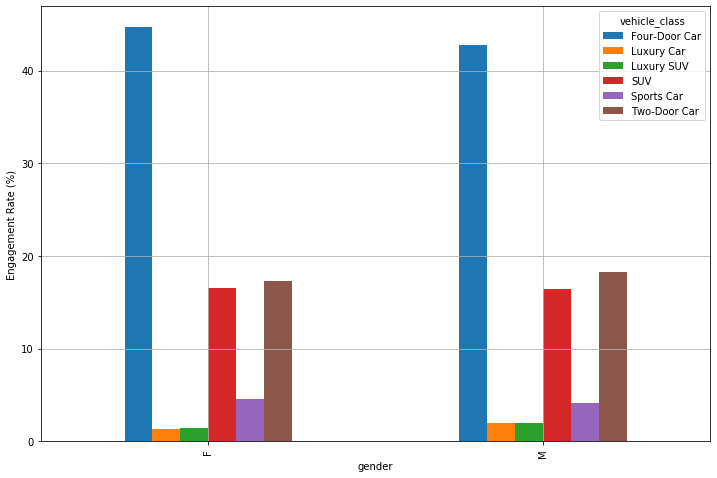

vehicle_class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
gender,,,,,,
F,0.446973,0.013525,0.013954,0.165736,0.045513,0.172606
M,0.427837,0.019660,0.019884,0.164433,0.040661,0.182752


In [17]:
engage('No', 'gender', 'vehicle_class')

**The classes are balanced. But we can see less female response. On the other hand, men have no engage if they have luxury cars.**

#### e) Analyzing engagement rates by different sales channel

In [18]:
by_sales_channel=data.loc[data.response=='Yes'].groupby('sales_channel')\
                     .count().customer/data.groupby('sales_channel').count().customer*100

by_sales_channel

sales_channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
Name: customer, dtype: float64

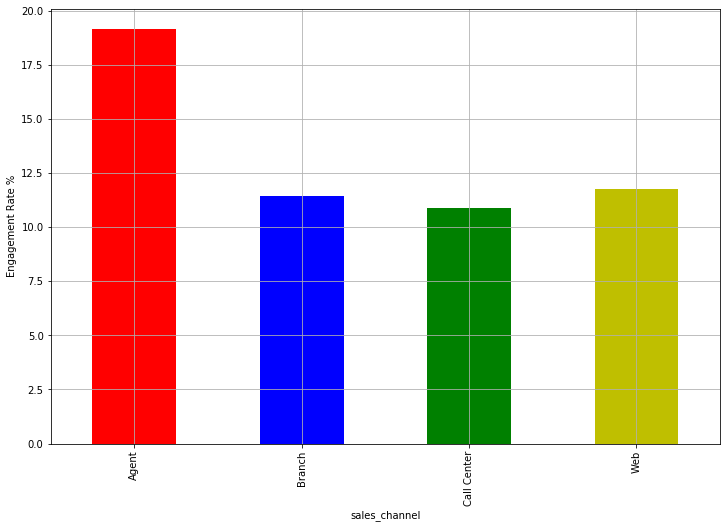

In [19]:
# bar plot
ax=by_sales_channel.plot(kind='bar', figsize=(12,8),
                                 color=['r','b','g','y'], grid=True)

ax.set_ylabel('Engagement Rate %')

plt.show();

**As we can notice, Agent works better in term of getting responses from the customers, and then sales through Web works the second best. We can check other relationships.**

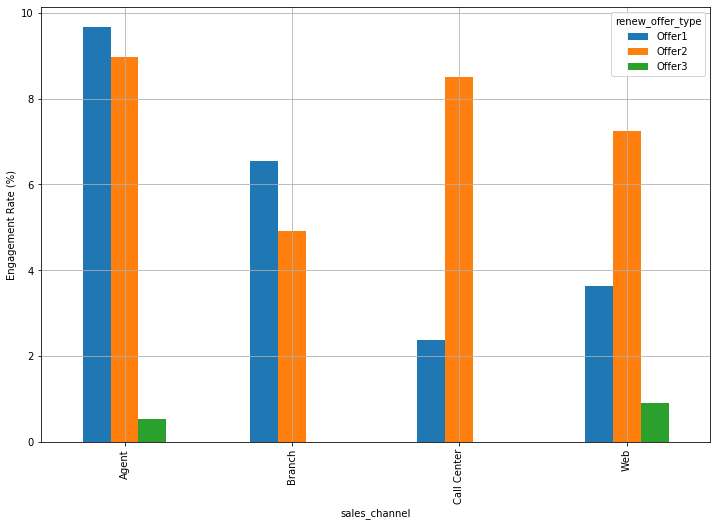

renew_offer_type,Offer1,Offer2,Offer3
sales_channel,,,
Agent,0.096635,0.089733,0.005177
Branch,0.065446,0.049085,0.000000
Call Center,0.023796,0.084986,0.000000
Web,0.036226,0.072453,0.009057


In [20]:
# Checking how different offers work on different sales channels 

engage('Yes', 'sales_channel', 'renew_offer_type')

**As we can see, offer type 3 does not work on branch and call center sales channel. Offer type 1 needs improve in call centers.**

#### e) Simple Clustering

We are going to segment our customer base by Customer Lifetime Value and Months Since Policy Inception.

For the previous output, we are going to define those customers with a CLV higher than the median as high-CLV customers, and those with a CLV lower than the median as low-CLV customers.

In [21]:
data['clv_segment']=data.customer_lifetime_value\
                        .apply(lambda x: 'high' if x>data.customer_lifetime_value.median() else 'low')

In [22]:
#doing the same for Months Since Policy Inception 

data.months_since_policy_inception.describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: months_since_policy_inception, dtype: float64

In [23]:
data['policy_age_segment']=data.months_since_policy_inception\
                               .apply(lambda x: 'high' if x>data.months_since_policy_inception.median() else 'low')

In [24]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_segment,policy_age_segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,low,low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,high,low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,high,low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,high,high
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,low,low


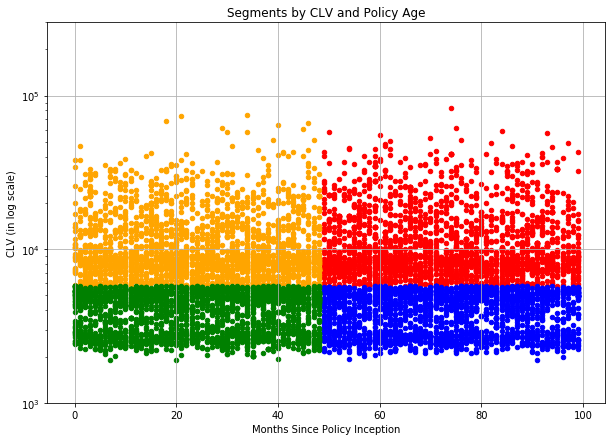

In [25]:
# visualizing these segments (4 comb high-low)


ax=data.loc[(data.clv_segment=='high')&(data.policy_age_segment=='high')]\
       .plot.scatter(x='months_since_policy_inception', 
                     y='customer_lifetime_value', 
                     logy=True,
                     color='red')

data.loc[(data.clv_segment=='low')&(data.policy_age_segment=='high')]\
    .plot.scatter(ax=ax,
                  x='months_since_policy_inception', 
                  y='customer_lifetime_value', 
                  logy=True,
                  color='blue')

data.loc[(data.clv_segment=='high')&(data.policy_age_segment=='low')]\
    .plot.scatter(ax=ax,
                  x='months_since_policy_inception', 
                  y='customer_lifetime_value', 
                  logy=True,
                  color='orange')

data.loc[(data.clv_segment=='low')&(data.policy_age_segment=='low')]\
    .plot.scatter(ax=ax,
                  x='months_since_policy_inception',
                  y='customer_lifetime_value', 
                  logy=True,
                  color='green',
                  grid=True,
                  figsize=(10, 7))

ax.set_ylim(1e3, 3*1e5)
ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show();

`logy=True` transform the scale to log scale and it is often used for monetary values as they often have high skewness in their values. 

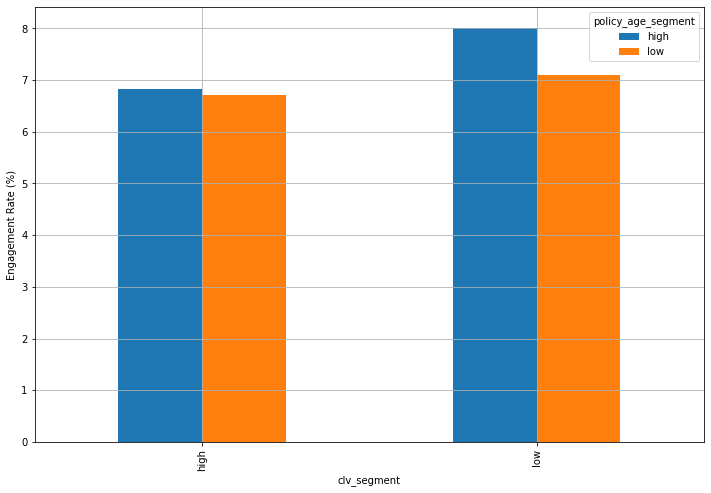

policy_age_segment,high,low
clv_segment,,
high,0.068331,0.067017
low,0.080123,0.070928


In [26]:
# checking if there is a noticable difference 

engage('Yes', 'clv_segment', 'policy_age_segment')

**As we can notice, High Policy Age Segment has higher engagement than the Low Policy Age Segment. This suggests that those customers who have been insured by this company longer respond better. Moreover, the High Policy Age and Low CLV segment has the highest engagement rate among the four segments.By creating different customer segments based on customer attributes, we can better understand how different groups of customers behave differently, and consequently, use this information to customize the marketing messagges.**

### Conclusion


+ Target:
    + **Improve CLV** (Average CLV: 8005)
    
+ Insights:
    + Only 14% of the customers responded to marketing calls (Improve response)
    + Offer Type 2 has the highest engagement rate (What's the difference between offers?)
    + Luxury SUV respond with a higher chance to Offer1 than to Offer2.
    + Mainly focus on four-door cars
    + Offer Type 3 is not representative (Change it and/or remove it, focus on luxury and sports cars. Same with offer type 4)
    + Women have less engaged 
    + Men have no engage if they have luxury cars
    + Offer type 3 does not work on branch and call center sales channel 
    + Offer type 1 needs improve in call centers 
    + Customers who have been insured longer respond better